9# Minor Project

In [1]:
import pandas as pd
import numpy as np
from datetime import date,datetime


from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
from bokeh.plotting import figure, output_notebook, show 

# sorting the index value of file by date.

In [3]:
data = pd.read_csv('covid_19_india.csv', parse_dates=['Date'], dayfirst=True)
data


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
3670,3671,2020-07-02,8:00 AM,Tripura,-,-,1093,1,1396
3671,3672,2020-07-02,8:00 AM,Uttarakhand,-,-,2317,41,2947
3672,3673,2020-07-02,8:00 AM,Uttar Pradesh,-,-,16629,718,24056
3673,3674,2020-07-02,8:00 AM,West Bengal,-,-,12528,683,19170


In [4]:
data_state = data.loc[data['State/UnionTerritory'] == "Maharashtra"]
data_state.head(5)


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
76,77,2020-03-09,6:00 PM,Maharashtra,2,0,0,0,2
91,92,2020-03-10,6:00 PM,Maharashtra,5,0,0,0,5
97,98,2020-03-11,6:00 PM,Maharashtra,2,0,0,0,2
120,121,2020-03-12,6:00 PM,Maharashtra,11,0,0,0,11
133,134,2020-03-13,6:00 PM,Maharashtra,14,0,0,0,14


In [5]:
#data_state["2020-06"]


In [6]:
confirmed_df = pd.read_csv('covid_19_india.csv')
print(confirmed_df.shape)

(3675, 9)


In [7]:
dateData= data.groupby(['Date'])['Cured','Deaths'].sum().reset_index()
#convert column into datetype
dateData['Date']=pd.to_datetime(dateData['Date'], format= '%d,%m,%y')
#sortby date
df_sorted= dateData.sort_values(by="Date", ascending ="True").set_index("Date")
df_sorted= df_sorted.groupby(['Date'])['Cured','Deaths'].sum().reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


# Scatter Plot of Confirmed Cases v/s Deaths

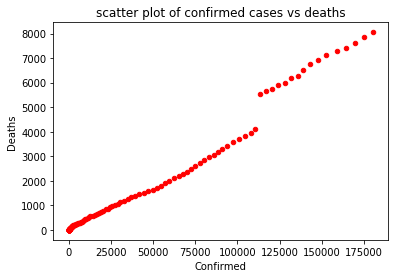

In [8]:
data_state.plot(kind='scatter',title="scatter plot of confirmed cases vs deaths", x='Confirmed',y='Deaths',color='red')
plt.show()

# Bar Graph

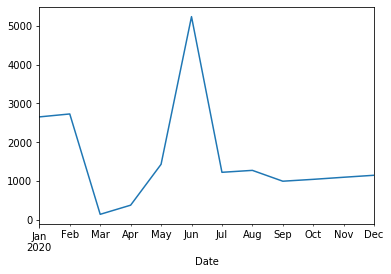

In [114]:
%matplotlib inline
data_state.Deaths.resample('M').mean().plot()

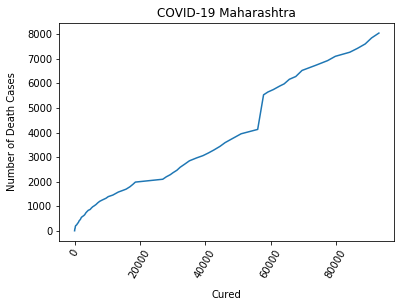

In [131]:
plt.plot(data_state.Cured,data_state.Deaths)
plt.title("COVID-19 Maharashtra")
plt.xticks(rotation=60)
plt.xlabel("Cured",labelpad=10)
plt.ylabel("Number of Death Cases",labelpad=10)
plt.show()

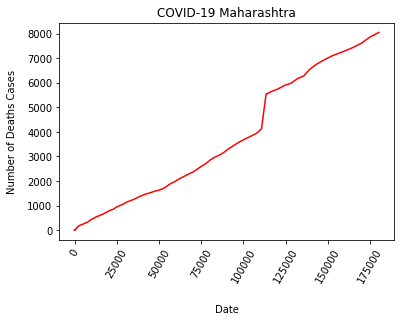

In [132]:
plt.plot(data_state.Confirmed,data_state.Deaths,color="red")
plt.title("COVID-19 Maharashtra")
plt.xticks(rotation=60)
plt.xlabel("Date",labelpad=20)
plt.ylabel("Number of Deaths Cases",labelpad=10)
plt.show()